<a href="https://colab.research.google.com/github/Pysrdafoice/Marchine_Learning1/blob/main/CNN_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('\n')
print('Dimensão do X de treino: '+str(x_train[0].shape))
print('Rotulo y: ' +str(y_train.shape))
print('\n')
print('Dimensão do X de teste: '+str(x_test[0].shape))
print('Rotulo y: ' +str(y_test.shape))
print('\n')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Dimensão do X de treino: (28, 28)
Rotulo y: (60000,)


Dimensão do X de teste: (28, 28)
Rotulo y: (10000,)




<Figure size 640x480 with 0 Axes>

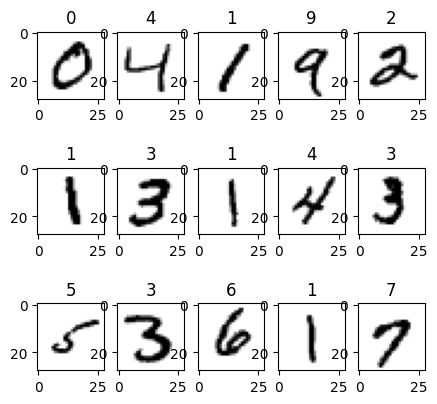

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure()
plt.figure(figsize = (5,5))
num_of_images = 15
for i in range(1, num_of_images +1):
  plt.subplot(3, 5, i).set_title(f'{y_train[i]}')
  plt.axis('on')
  plt.imshow(x_train[i], cmap='gray_r')
plt.show()

In [ ]:
linhas = x_train[0].shape[0]
colunas = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0], linhas, colunas, 1)
x_test = x_test.reshape(x_test.shape[0], linhas, colunas, 1)

input_shape = (linhas, colunas, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam


In [ ]:
num_classes = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0005),
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
batch_size = 128
epochs = 3

history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))


Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 275s 581ms/step - accuracy: 0.7873 - loss: 0.6654 - val_accuracy: 0.9778 - val_loss: 0.0702
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 324s 586ms/step - accuracy: 0.9565 - loss: 0.1494 - val_accuracy: 0.9835 - val_loss: 0.0469
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 317s 576ms/step - accuracy: 0.9669 - loss: 0.1130 - val_accuracy: 0.9862 - val_loss: 0.0425


In [ ]:
batch_size = 64
epochs = 6

history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 260s 277ms/step - accuracy: 0.9694 - loss: 0.1035 - val_accuracy: 0.9868 - val_loss: 0.0415
Epoch 2/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.9771 - loss: 0.0775Epoch 3/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 320s 280ms/step - accuracy: 0.9792 - loss: 0.0675 - val_accuracy: 0.9890 - val_loss: 0.0347
Epoch 4/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 253s 270ms/step - accuracy: 0.9814 - loss: 0.0594 - val_accuracy: 0.9899 - val_loss: 0.0316
Epoch 5/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 263s 271ms/step - accuracy: 0.9847 - loss: 0.0488 - val_accuracy: 0.9901 - val_loss: 0.0348
Epoch 6/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 262s 271ms/step - accuracy: 0.9869 - loss: 0.0422 - val_accuracy: 0.9908 - val_loss: 0.0317
Test loss: 0.03170594573020935
Test accuracy: 0.9908000230789185


<Figure size 640x480 with 0 Axes>

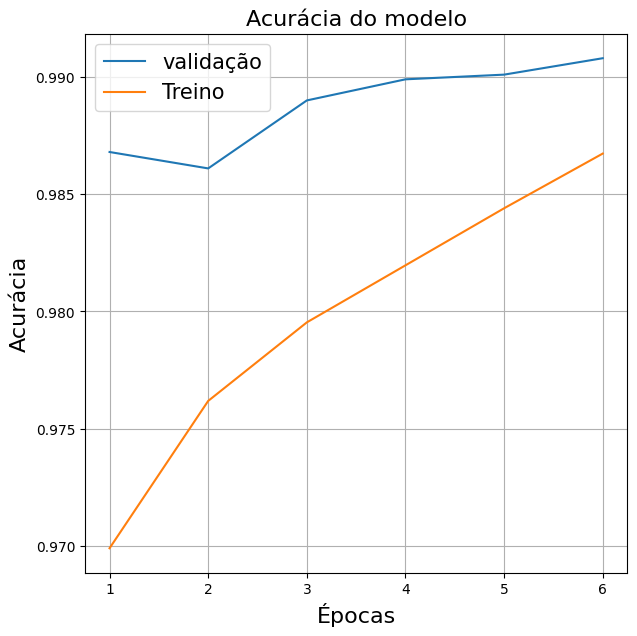

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history


epochs = range(1, len(history_dict['val_accuracy']) + 1)

figure = plt.figure()
plt.figure(figsize = (7,7))

line1 = plt.plot(epochs, history_dict['val_accuracy'], label='validação')
line2 = plt.plot(epochs, history_dict['accuracy'], label='Treino')
plt.title('Acurácia do modelo', fontsize = 16)
plt.xlabel('Épocas', fontsize = 16)
plt.ylabel('Acurácia', fontsize = 16)
plt.grid(True)
plt.legend(prop = {'size': 15})
plt.show()